In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Variance: Covariance and correlation

**Variance**
$$\sigma^2 = \dfrac{1}{n}\displaystyle\sum_{i=1}^{n}(x_i-\mu)^2$$

**Covariance** ($\sigma_{xy}$)  
1. Mean normalization
2. Dot product
$$\sigma_{XY} = \dfrac{1}{n}\displaystyle\sum_{i=1}^{n}(x_i -\mu_x)(y_i - \mu_y)$$


- Positive: **positively related**
- Negative: **inversely related**
- Equal or close to 0: **no linear relationship**

**Correlation** (standardizing covariance)

- Pearson's correlation coefficient $r$ (linear correlation coefficient) (between -1 and 1)
$$ r = \frac{\sum_{i=1}^{n}(x_i -\mu_x)(y_i - \mu_y)} {\sqrt{\sum_{i=1}^{n}(x_i - \mu_x)^2 \sum_{i=1}^{n}(y_i-\mu_y)^2}}$$

# Statistical learning theory

**Types of data**  
- Data that can be controlled directly (**independent variables** / **features**): time, age (features)
- Data that cannot be controlled directly (**dependent variables**): weight over age (target)
- **controlled variable**

A **model** defines the relationship between a dependent and an independent variable

**model parameters**: co-efficients of the model equation for estimating the output

**Loss function**: evaluates how well the model represents the relationship between variables (low if well modeled)

# Linear regression

- Simple linear regression
- Multiple linear regression

Components
- dependent variable
- independent variable
- slope
- intercept

Calculating regression (**least squares method**)
- The mean of the X $(\bar{X})$
- The mean of the Y $(\bar{Y})$
- The standard deviation of the X values $(S_X)$
- The standard deviation of the y values $(S_Y)$
- The correlation between X and Y ( often denoted by the Greek letter "Rho" or $\rho$ - Pearson Correlation)

**Slope** (m):
$$\hat m = \rho \frac{S_Y}{S_X}$$

**Y-intercept** (b):
$(\hat y = \hat m x+ \hat c)$ -> $$\bar{Y} = \hat c + \hat m \bar{X}$$
$$ \hat c = \bar{Y} - \hat m\bar{X}$$

## Coefficient of Determination (R-Squared $R^2$)

Compares regression line with baseline (worst) model

An obtained R-squared value of say 0.85 can be put into a statement as
> ***85% of the variations in dependent variable $y$ are explained by the independent variable in our model.***

## Regression asumptions

- Linearity (scatter plots). Check for outliers
- Normality: **model residuals** should follow a normal distribution (histograms or Q-Q plots)
- Homoscedasticity <> Heteroscedasticity: dependent variable variability (scatter)

## OLS (Ordinary Least Squared) in statsmodels

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     384.8
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           1.35e-13
Time:                        19:40:57   Log-Likelihood:                -64.112
No. Observations:                  20   AIC:                             132.2
Df Residuals:                      18   BIC:                             134.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -204.4834     18.929    -10.802      0.000    -244.252    -164.714
height         5.5390      0.282     19.616      0.000       4.946       6.132
==============================================================================
Omnibus:                        2.588   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                1.245
Skew:                           0.202   Prob(JB):                        0.537
Kurtosis:                       1.846   Cond. No.                         902.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

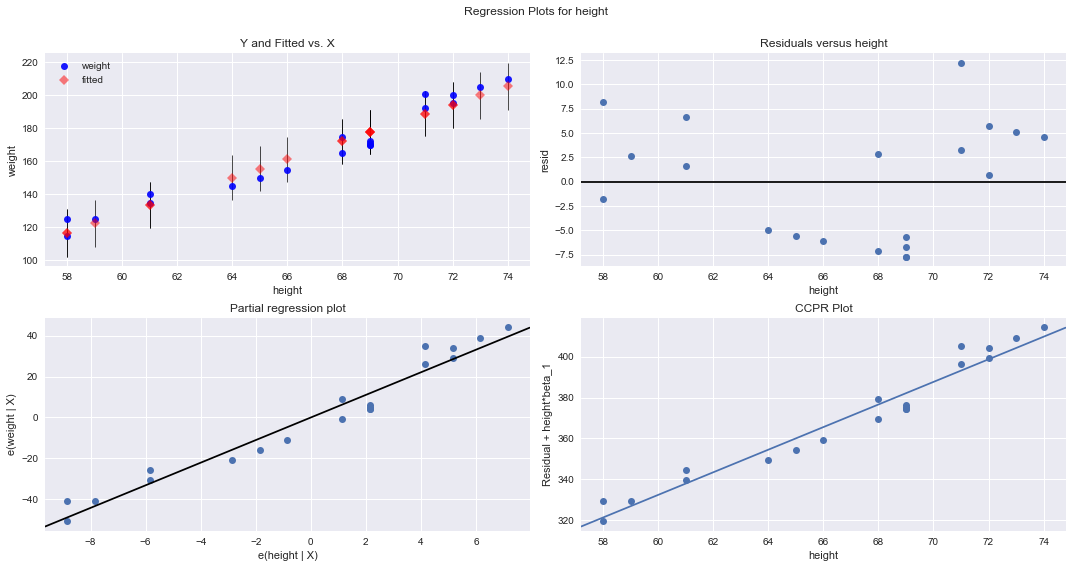

C:\Data\Python37\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


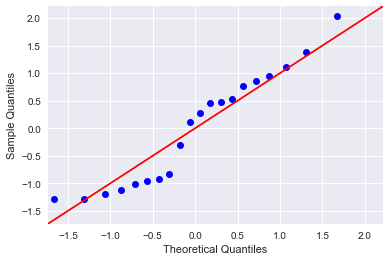

In [3]:
df = pd.read_csv('../Data/heightWeight.csv')

f = 'weight~height'
model = ols(formula=f, data=df).fit()
display(model.summary())

# error terms (residuals)
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "height", fig=fig)
plt.show()

# q-q plots
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

## Regression diagnostics in statsmodels

- Normality check (Q-Q plots)
- Normality check (Jarque-Bera test): > 6: errors are not normally distributed
- Heteroscadasticity (Goldfield-Quandt test - GQ): assumes data is normally distributed